<a href="https://colab.research.google.com/github/Beban9999/Machine-Learning-Projects/blob/main/Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

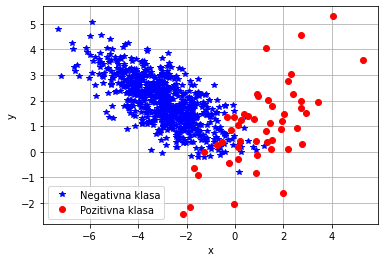

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M1 = [-3, 2]
Sigma1 = [[2, -1], [-1, 1]]
M2 = [1, 1]
Sigma2 = [[2, 1], [1, 2]]

np.random.seed(0)

Negativna1, Negativna2 = np.random.multivariate_normal(M1, Sigma1, 700).T
Pozitivna1, Pozitivna2 = np.random.multivariate_normal(M2, Sigma2, 50).T

plt.plot(Negativna1, Negativna2, 'b*', label = 'Negativna klasa')
plt.plot(Pozitivna1, Pozitivna2, 'ro', label = 'Pozitivna klasa')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

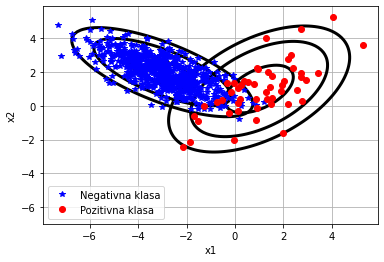

In [ ]:
from scipy import linalg

invSigma1 = linalg.inv(Sigma1)
invSigma2 = linalg.inv(Sigma2)

m11 = M2[0]
m12 = M2[1]
m21 = M1[0]
m22 = M1[1]

z11 = Sigma1[0][0]
z12 = Sigma1[0][1]
z21 = Sigma1[1][0]
z22 = Sigma1[1][1]

k11 = Sigma2[0][0]
k12 = Sigma2[0][1]
k21 = Sigma2[1][0]
k22 = Sigma2[1][1]

s1 = np.linspace(-7, 5, 100)
s2 = np.linspace(-7, 5, 100)

x1pom, x2pom = np.meshgrid(s1, s2)
d1=(invSigma1[0,0]*(x1pom-M1[0])+invSigma1[0,1]*(x2pom-M1[1]))*(x1pom-M1[0])+(invSigma1[1,0]*(x1pom-M1[0])+invSigma1[1,1]*(x2pom-M1[1]))*(x2pom-M1[1])
d2=(invSigma2[0,0]*(x1pom-M2[0])+invSigma2[0,1]*(x2pom-M2[1]))*(x1pom-M2[0])+(invSigma2[1,0]*(x1pom-M2[0])+invSigma2[1,1]*(x2pom-M2[1]))*(x2pom-M2[1]) 

plt.plot(Negativna1, Negativna2, 'b*', label = 'Negativna klasa')
plt.plot(Pozitivna1, Pozitivna2, 'ro', label = 'Pozitivna klasa')
plt.contour(x1pom,x2pom,d2,[1,4,7],colors='k',linewidths=3)
plt.contour(x1pom,x2pom,d1,[1,4,7],colors='k',linewidths=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()


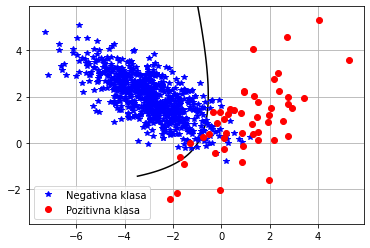

In [ ]:
X=np.arange(-3.5,6,0.1)
Y=np.arange(-3.5,6,0.1)
x1,x2=np.meshgrid(X,Y)




P1 = 0.9
P2 = 0.1

y=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

plt.plot(Negativna1, Negativna2, 'b*', label = 'Negativna klasa')
plt.plot(Pozitivna1, Pozitivna2, 'ro', label = 'Pozitivna klasa')
plt.grid(True)
plt.contour(x1,x2,y,0, colors = 'black')
plt.legend()
plt.show()



In [ ]:
x1p1 = Negativna1
x2p1 = Negativna2

h1=0.5*(((x1p1-m11)*z11+(x2p1-m12)*z21)*(x1p1-m11)+((x1p1-m11)*z12+(x2p1-m12)*z22)*(x2p1-m12))-0.5*(((x1p1-m21)*k11+(x2p1-m22)*k21)*(x1p1-m21)+((x1p1-m21)*k12+(x2p1-m22)*k22)*(x2p1-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2)) + np.log(P1/P2)



greska1 = 0
for i in h1:
  if i < 0:
    greska1+=1


x1p2 = Pozitivna1
x2p2 = Pozitivna2

h2=0.5*(((x1p2-m11)*z11+(x2p2-m12)*z21)*(x1p2-m11)+((x1p2-m11)*z12+(x2p2-m12)*z22)*(x2p2-m12))-0.5*(((x1p2-m21)*k11+(x2p2-m22)*k21)*(x1p2-m21)+((x1p2-m21)*k12+(x2p2-m22)*k22)*(x2p2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2)) + np.log(P1/P2)



greska2 = 0
for i in h2:
  if i > 0:
    greska2+=1



Matrix = [['/', '  P', '  N'],['P ', 50-greska2,' ', greska2],['N ', greska1,' ', 700-greska1]]
[print(*line) for line in Matrix]


Tacnost = (700+50)/(700+50+greska1+greska2)
Preciznost = (50 - greska2)/((50 - greska2) + greska2)
Odziv = (50 - greska2)/((50-greska2) + greska1)
print('Tacnost = ', Tacnost)
print('Preciznost = ', Preciznost)
print('Odziv = ', Odziv)

#Izgled cele matrice konfuzije sa FP i FN vrednostima.
#Zakljucujemo da nam je vrednost False Negative vrednost 35
#Preciznost nam govori da 90 posto pozitivnih zaista pozitivno
#Odziv nam govori da je od ukupnog broja pacijenata koji su klasifikovani kao pozitivni samo 34 posto zapravo pozitivno a ostalo je greska!
#Iz ovoga zakljucujemo da gore navedena Tacnost nije zapravo dobra metrika.




/   P   N
P  48   2
N  35   665
Tacnost =  0.9529860228716646
Preciznost =  0.96
Odziv =  0.5783132530120482


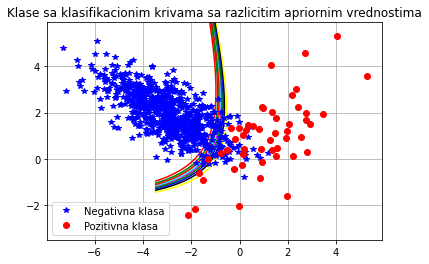

In [ ]:
P1 = 0.5
P2 = 0.5

y1=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.4
P2 = 0.6

y2=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.3
P2 = 0.7

y3=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.2
P2 = 0.8

y4=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.1
P2 = 0.9

y5=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.9
P2 = 0.1

y6=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.8
P2 = 0.2

y7=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.7
P2 = 0.3

y8=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.6
P2 = 0.4

y9=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)


plt.plot(Negativna1, Negativna2, 'b*', label = 'Negativna klasa')
plt.plot(Pozitivna1, Pozitivna2, 'ro', label = 'Pozitivna klasa')
plt.contour(x1,x2,y1,0, colors = 'magenta')
plt.contour(x1,x2,y2,0, colors = 'cyan')
plt.contour(x1,x2,y3,0, colors = 'red')
plt.contour(x1,x2,y4,0, colors = 'green')
plt.contour(x1,x2,y5,0, colors = 'red')
plt.contour(x1,x2,y6,0, colors = 'yellow')
plt.contour(x1,x2,y7,0, colors = 'black')
plt.contour(x1,x2,y8,0, colors = 'blue')
plt.contour(x1,x2,y9,0, colors = 'green')
plt.grid(True)
plt.legend()
plt.title('Klase sa klasifikacionim krivama sa razlicitim apriornim vrednostima')
plt.show()

0.95
P1 = 0.9 || P2 = 0.1
False Positive Rate:  0.95
True Positive Rate:  0.96
P1 = 0.8 || P2 = 0.2
False Positive Rate:  0.94
True Positive Rate:  0.98
P1 = 0.7 || P2 = 0.3
False Positive Rate:  0.9328571428571428
True Positive Rate:  0.98
P1 = 0.6 || P2 = 0.4
False Positive Rate:  0.9314285714285714
True Positive Rate:  1.0
P1 = 0.5 || P2 = 0.5
False Positive Rate:  0.9257142857142857
True Positive Rate:  1.0
P1 = 0.4 || P2 = 0.6
False Positive Rate:  0.92
True Positive Rate:  1.0
P1 = 0.3|| P2 = 0.7
False Positive Rate:  0.9128571428571428
True Positive Rate:  1.0
P1 = 0.2 || P2 = 0.8
False Positive Rate:  0.9042857142857142
True Positive Rate:  1.0
P1 = 0.1 || P2 = 0.9
False Positive Rate:  0.8957142857142857
True Positive Rate:  1.0


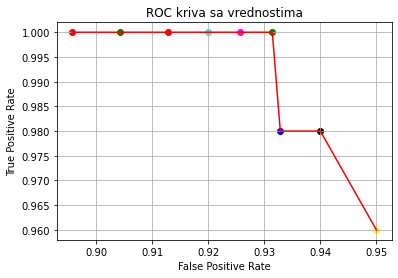

In [ ]:
def FPcalc(P1, P2):
 x1p2 = Pozitivna1
 x2p2 = Pozitivna2

 h2=0.5*(((x1p2-m11)*z11+(x2p2-m12)*z21)*(x1p2-m11)+((x1p2-m11)*z12+(x2p2-m12)*z22)*(x2p2-m12))-0.5*(((x1p2-m21)*k11+(x2p2-m22)*k21)*(x1p2-m21)+((x1p2-m21)*k12+(x2p2-m22)*k22)*(x2p2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2)) + np.log(P1/P2)



 greska2 = 0
 for i in h2:
  if i < 0:
   greska2+=1
 return greska2


def FNcalc(P1, P2):
 x1p1 = Negativna1
 x2p1 = Negativna2

 h1=0.5*(((x1p1-m11)*z11+(x2p1-m12)*z21)*(x1p1-m11)+((x1p1-m11)*z12+(x2p1-m12)*z22)*(x2p1-m12))-0.5*(((x1p1-m21)*k11+(x2p1-m22)*k21)*(x1p1-m21)+((x1p1-m21)*k12+(x2p1-m22)*k22)*(x2p1-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2)) + np.log(P1/P2)



 greska1 = 0
 for i in h1:
   if i > 0:
    greska1+=1
 return (greska1)


print(FNcalc(0.9, 0.1)/700)

TPR = (FPcalc(0.9, 0.1)) / 50
FPR = (FNcalc(0.9, 0.1)/700)
FPRlist = [FPR]
TPRlist = [TPR]
print('P1 = 0.9 || P2 = 0.1')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)

plt.scatter(FPR, TPR, color = 'yellow')

TPR = (FPcalc(0.8, 0.2)) / 50
FPR = (FNcalc(0.8, 0.2)/700)
FPRlist.append(FPR)
TPRlist.append(TPR)
print('P1 = 0.8 || P2 = 0.2')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
plt.scatter(FPR, TPR, color = 'black')

TPR = (FPcalc(0.7, 0.3)) / 50
FPR = (FNcalc(0.7, 0.3)/700)
print('P1 = 0.7 || P2 = 0.3')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)
plt.scatter(FPR, TPR, color = 'blue')

TPR = (FPcalc(0.6, 0.4)) / 50
FPR = (FNcalc(0.6, 0.4)/700)
print('P1 = 0.6 || P2 = 0.4')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)
plt.scatter(FPR, TPR, color = 'green')

TPR = (FPcalc(0.5, 0.5)) / 50
FPR = (FNcalc(0.5, 0.5)/700)
print('P1 = 0.5 || P2 = 0.5')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)

plt.scatter(FPR, TPR, color = 'magenta')

TPR = (FPcalc(0.4, 0.6)) / 50
FPR = (FNcalc(0.4, 0.6)/700)
print('P1 = 0.4 || P2 = 0.6')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)

plt.scatter(FPR, TPR, color = 'cyan')

TPR = (FPcalc(0.3, 0.7)) / 50
FPR = (FNcalc(0.3, 0.7)/700)
print('P1 = 0.3|| P2 = 0.7')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)

plt.scatter(FPR, TPR, color = 'red')

TPR = (FPcalc(0.2, 0.8)) / 50
FPR = (FNcalc(0.2, 0.8)/700)
print('P1 = 0.2 || P2 = 0.8')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)
plt.scatter(FPR, TPR, color = 'green')

TPR = (FPcalc(0.1, 0.9)) / 50
FPR = (FNcalc(0.1, 0.9)/700)
print('P1 = 0.1 || P2 = 0.9')
print('False Positive Rate: ', FPR)
print('True Positive Rate: ', TPR)
FPRlist.append(FPR)
TPRlist.append(TPR)
plt.scatter(FPR, TPR, color = 'red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(FPRlist, TPRlist, color = 'red')
plt.title('ROC kriva sa vrednostima')
plt.grid(True)
plt.show()

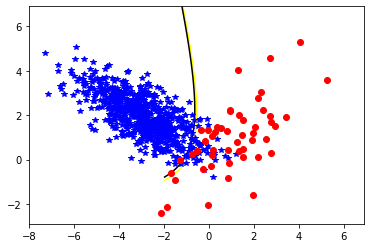

In [ ]:
#Iz prethodne slike zakljucujemo da su nam crni i zuti klasifikatori najbolji!
#True positive je veliki dok nam je False Positive dosta mali.
#Isto mozemo da zakljucimo i iz slike ROC krive jer su vrednosti na vrhu

P1 = 0.9
P2 = 0.1

y11=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

P1 = 0.8
P2 = 0.2

y22=0.5*(((x1-m11)*z11+(x2-m12)*z21)*(x1-m11)+((x1-m11)*z12+(x2-m12)*z22)*(x2-m12))-0.5*(((x1-m21)*k11+(x2-m22)*k21)*(x1-m21)+((x1-m21)*k12+(x2-m22)*k22)*(x2-m22))+0.5*np.log(np.linalg.det(Sigma1)/np.linalg.det(Sigma2))+np.log(P1/P2)

plt.plot(Negativna1, Negativna2, 'b*', label = 'Negativna klasa')
plt.plot(Pozitivna1, Pozitivna2, 'ro', label = 'Pozitivna klasa')
plt.contour(x1,x2,y11,0, colors = 'yellow')
plt.contour(x1,x2,y22,0, colors = 'black')

plt.show()



In [ ]:
#ZADATAK 2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

novcanice = pd.read_csv('/content/Novcanice.txt', header = None)

print('Dimenzije skupa =', novcanice.shape) 
novcanice.describe()


Dimenzije skupa = (1372, 5)


,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


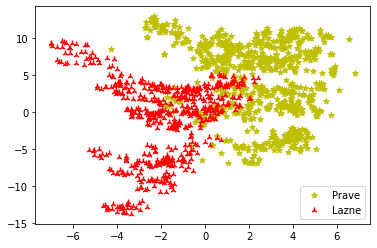

In [ ]:
X = novcanice.iloc[:,0:4]
X = X.to_numpy()
Y = novcanice.iloc[:,4]
Y = Y.to_numpy()

plt.scatter(X[0:763,0], X[0:763,1],c=u'y',marker='*', label='Prave') 
plt.scatter(X[763:,0], X[763:,1], c=u'r',marker='2', label='Lazne')



plt.legend()
plt.show()

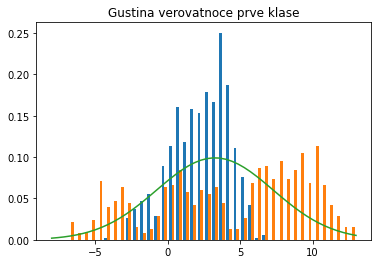

In [ ]:
from scipy.stats import norm
raspodela = norm(np.mean(X[0:763,:2]), np.std(X[0:763,:2]))
broj_tacaka=np.linspace(-8,13)
fgv = [raspodela.pdf(tacke) for tacke in broj_tacaka]
plt.hist(X[0:763,:2], bins = 40, density = True)
plt.plot(broj_tacaka,fgv)
plt.title('Gustina verovatnoce prve klase')

plt.show()

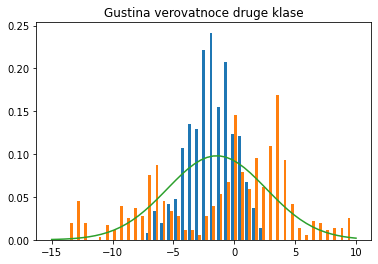

In [ ]:
raspodela = norm(np.mean(X[763:,:2]), np.std(X[763:,:2]))
broj_tacaka=np.linspace(-15,10)
fgv = [raspodela.pdf(tacke) for tacke in broj_tacaka]
plt.hist(X[763:,:2], bins = 40, density = True)
plt.plot(broj_tacaka,fgv)
plt.title('Gustina verovatnoce druge klase')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = X[:,0:2]
X_obucavajuci, X_testirajuci, Y_obucavajuci, Y_testirajuci= train_test_split(X, Y, test_size=0.20, random_state=1)
print(X_obucavajuci.shape, X_testirajuci.shape,Y_obucavajuci.shape,Y_testirajuci.shape)

(1097, 2) (275, 2) (1097,) (275,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


models = [] 
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('SVM', SVC(C=0.5, kernel='linear'))) 
results = [] 
names = []

for name, model in models: 
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
  cv_results = cross_val_score(model, X_obucavajuci, Y_obucavajuci,cv=kfold, scoring='accuracy')
  results.append(cv_results) 
  names.append(name) 
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))








LR: 0.881426 (0.030492)
LDA: 0.883253 (0.029298)
KNN: 0.933411 (0.014956)
CART: 0.928866 (0.020779)
SVM: 0.876856 (0.036108)


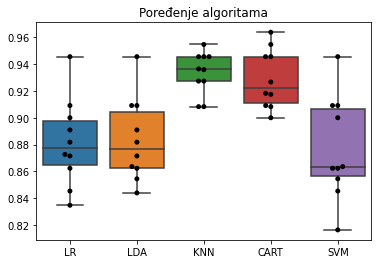

In [ ]:
import numpy as np 
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')
ax = sns.boxplot(data=results) 
ax = sns.swarmplot(data=results, color="black") 
plt.xticks(np.arange(0, 5),names) 
plt.title('Poređenje algoritama') 
plt.show()

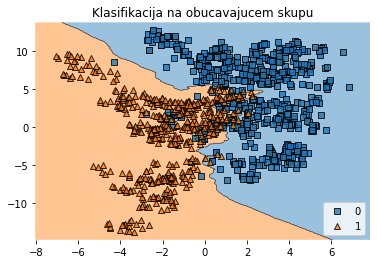

In [ ]:
#Sa slike zakljucujemo da je KNN najbolji za koriscenje u ovom primeru
#Vecina vrednosti je iznad 0.92, dok je mali deo ispod toga

model = KNeighborsClassifier()
model.fit(X_obucavajuci, Y_obucavajuci)

predictions = model.predict(X_testirajuci)

import mlxtend 
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_obucavajuci, Y_obucavajuci, clf=model) 
plt.title('Klasifikacija na obucavajucem skupu') 
plt.legend(loc = 'lower right')
plt.show()


Tacnost:  0.9490909090909091


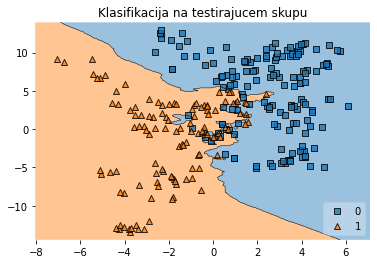

In [ ]:
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions 


print("Tacnost: ",accuracy_score(Y_testirajuci, predictions))
plot_decision_regions(X_testirajuci, Y_testirajuci, clf=model, legend=4) 
plt.title('Klasifikacija na testirajucem skupu') 
plt.show()

#Tacnost modela je zadovoljavajuca (94%)
#Mozemo iz same slike da zakljucimo da je klasifikacija dobro izvrsena

In [ ]:
#ZADATAK 3
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Names = ['X', 'Y']

osiguranje = pd.read_csv('/content/Osiguranje.csv', names= Names)
print(osiguranje.shape)
osiguranje.describe()
print(osiguranje.head(20))

(63, 2)
      X      Y
0   108    NaN
1    19   46.2
2    13   15.7
3   124    NaN
4    40  119.4
5    57  170.9
6    23   56.9
7    14   77.5
8    45    NaN
9    10   65.3
10    5   20.9
11   48  248.1
12   11   23.5
13   23    NaN
14    7   48.8
15    2    6.6
16   24  134.9
17    6   50.9
18    3    4.4
19   23  113.0


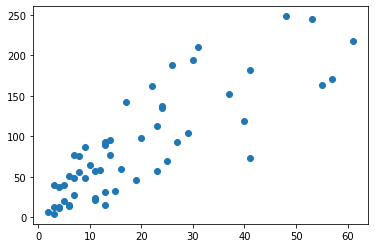

In [ ]:
#osiguranje.fillna(osiguranje.mean(), inplace=True)
osiguranje = osiguranje.dropna()
#Ostavljeno je komentarisano deo gde se menjaju Nan vrednosti sa srednjom vrednosti
#Kada bi pokrenuli sa tim delom, umesto da izbacujemo Nan vrednosti regresija bi bila jako losa


osiguranje.describe()

X = osiguranje['X']
Y = osiguranje['Y']
X = X.to_numpy()
Y = Y.to_numpy()

plt.scatter(X, Y)



In [ ]:
from sklearn.linear_model import LinearRegression

X_obucavajuci, X_testirajuci, Y_obucavajuci, Y_testirajuci = train_test_split(X, Y, test_size=0.30, random_state=1)
regresija = LinearRegression()
print(X_obucavajuci.shape,X_testirajuci.shape,Y_obucavajuci.shape,Y_testirajuci.shape )

#Prebacujemo u 2D da bi mogli da radimo regresiju
X_obucavajuci=np.reshape(X_obucavajuci,(-1,1)) 
Y_obucavajuci=np.reshape(Y_obucavajuci,(-1,1)) 
X_testirajuci=np.reshape(X_testirajuci,(-1,1)) 
Y_testirajuci=np.reshape(Y_testirajuci,(-1,1))

print(X_obucavajuci.shape,X_testirajuci.shape,Y_obucavajuci.shape,Y_testirajuci.shape )


(38,) (17,) (38,) (17,)
(38, 1) (17, 1) (38, 1) (17, 1)


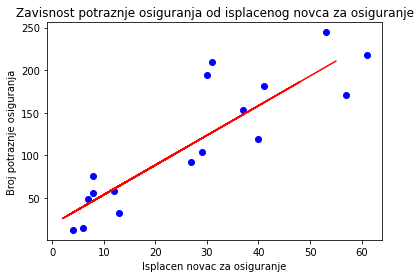

In [ ]:
regresija.fit(X_obucavajuci, Y_obucavajuci)
Y_predikcija = regresija.predict(X_testirajuci)

plt.scatter(X_testirajuci,Y_testirajuci,color='blue') 
plt.plot(X_obucavajuci, regresija.predict(X_obucavajuci), color='red') 
plt.xlabel('Isplacen novac za osiguranje') 
plt.ylabel('Broj potraznje osiguranja') 
plt.title('Zavisnost potraznje osiguranja od isplacenog novca za osiguranje') 
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_testirajuci/max(Y_testirajuci),Y_predikcija/max(Y_predikcija)))
print(metrics.r2_score(Y_testirajuci/max(Y_testirajuci),Y_predikcija/max(Y_predikcija)))

0.02151700932667341
0.7629038735688708


In [ ]:
Predikcija = 90
Predikcija = np.reshape(Predikcija, (-1,1))

predict = regresija.predict(Predikcija)
print('Broj potraznje osiguranja za isplaceno 90K:  %.5f' % predict)

#Rezultat je sustinski tacan sto mozemo da zakljucimo iz grafika.
#Primecujemo da nam je tacnost i ne toliko zadovoljavajuca 0.76...


Broj potraznje osiguranja za isplaceno 90K:  332.75332
